In [1]:
import torch
import numpy as np

# Tensors

In [2]:
nums = np.arange(0, 20)
nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [3]:
tensor = torch.tensor(nums)
tensor

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19], dtype=torch.int32)

In [4]:
Tensor = torch.Tensor(nums)
Tensor

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

In [9]:
dim_tensor = torch.arange(0, 12).reshape(3, 4)
dim_tensor

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [10]:
arr_tensor = torch.tensor([1, 4, 8])
arr_tensor

tensor([1, 4, 8])

In [11]:
new_type_tensor = arr_tensor.type(torch.float64)
new_type_tensor

tensor([1., 4., 8.], dtype=torch.float64)

In [17]:
dim_tensor[:,1]

tensor([1, 5, 9])

In [19]:
sum_tensor = torch.add(tensor, Tensor)
sum_tensor

tensor([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
        28., 30., 32., 34., 36., 38.])

In [20]:
multiply_tensor = torch.mul(tensor, Tensor)
multiply_tensor

tensor([  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100., 121.,
        144., 169., 196., 225., 256., 289., 324., 361.])

In [31]:
norm_tensor = Tensor.norm()
norm_tensor

tensor(49.6991)

In [32]:
count_tensor = Tensor.numel()
count_tensor

20

# Gradients

In [21]:
x = torch.tensor(2.0, requires_grad=True)
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
y

tensor(63., grad_fn=<AddBackward0>)

In [22]:
y_backpropagation = y.backward()
x_gradient = x.grad
x_gradient

tensor(93.)

In [23]:
z = torch.tensor([[1., 2., 3.], [3., 2., 1.]], requires_grad=True)
z

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)

In [28]:
v = 3*z + 2
v

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)

In [30]:
f = 2*v**2
f 

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)

In [31]:
out = f.mean()
out

tensor(140., grad_fn=<MeanBackward0>)

In [32]:
out_backpropagation = out.backward()
z_gradient = z.grad
z_gradient

tensor([[10., 16., 22.],
        [22., 16., 10.]])

# Linear Regression

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [145]:
X = torch.linspace(1, 100, 100).reshape(-1, 1)
X

tensor([[  1.],
        [  2.],
        [  3.],
        [  4.],
        [  5.],
        [  6.],
        [  7.],
        [  8.],
        [  9.],
        [ 10.],
        [ 11.],
        [ 12.],
        [ 13.],
        [ 14.],
        [ 15.],
        [ 16.],
        [ 17.],
        [ 18.],
        [ 19.],
        [ 20.],
        [ 21.],
        [ 22.],
        [ 23.],
        [ 24.],
        [ 25.],
        [ 26.],
        [ 27.],
        [ 28.],
        [ 29.],
        [ 30.],
        [ 31.],
        [ 32.],
        [ 33.],
        [ 34.],
        [ 35.],
        [ 36.],
        [ 37.],
        [ 38.],
        [ 39.],
        [ 40.],
        [ 41.],
        [ 42.],
        [ 43.],
        [ 44.],
        [ 45.],
        [ 46.],
        [ 47.],
        [ 48.],
        [ 49.],
        [ 50.],
        [ 51.],
        [ 52.],
        [ 53.],
        [ 54.],
        [ 55.],
        [ 56.],
        [ 57.],
        [ 58.],
        [ 59.],
        [ 60.],
        [ 61.],
        [ 62.],
        

In [146]:
error = torch.randint(-8, 9, (100, 1), dtype=torch.float)
error

tensor([[-6.],
        [ 3.],
        [-6.],
        [-7.],
        [ 0.],
        [-5.],
        [-8.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 4.],
        [ 8.],
        [ 7.],
        [-8.],
        [ 0.],
        [-4.],
        [ 3.],
        [ 6.],
        [ 2.],
        [ 7.],
        [ 3.],
        [-4.],
        [-1.],
        [-5.],
        [-5.],
        [ 6.],
        [-4.],
        [ 5.],
        [-8.],
        [ 4.],
        [ 4.],
        [-3.],
        [ 2.],
        [ 6.],
        [-5.],
        [-2.],
        [-2.],
        [-8.],
        [-3.],
        [-8.],
        [ 7.],
        [ 1.],
        [ 6.],
        [-8.],
        [-5.],
        [ 8.],
        [ 6.],
        [ 4.],
        [ 7.],
        [-8.],
        [ 7.],
        [-7.],
        [-4.],
        [ 0.],
        [-6.],
        [-4.],
        [ 7.],
        [ 8.],
        [ 2.],
        [ 8.],
        [-5.],
        [ 5.],
        [-3.],
        [-8.],
        [-6.],
        [ 6.],
        [ 

In [147]:
y = 2*X + 1 + error
y

tensor([[ -3.],
        [  8.],
        [  1.],
        [  2.],
        [ 11.],
        [  8.],
        [  7.],
        [ 23.],
        [ 21.],
        [ 17.],
        [ 27.],
        [ 33.],
        [ 34.],
        [ 21.],
        [ 31.],
        [ 29.],
        [ 38.],
        [ 43.],
        [ 41.],
        [ 48.],
        [ 46.],
        [ 41.],
        [ 46.],
        [ 44.],
        [ 46.],
        [ 59.],
        [ 51.],
        [ 62.],
        [ 51.],
        [ 65.],
        [ 67.],
        [ 62.],
        [ 69.],
        [ 75.],
        [ 66.],
        [ 71.],
        [ 73.],
        [ 69.],
        [ 76.],
        [ 73.],
        [ 90.],
        [ 86.],
        [ 93.],
        [ 81.],
        [ 86.],
        [101.],
        [101.],
        [101.],
        [106.],
        [ 93.],
        [110.],
        [ 98.],
        [103.],
        [109.],
        [105.],
        [109.],
        [122.],
        [125.],
        [121.],
        [129.],
        [118.],
        [130.],
        

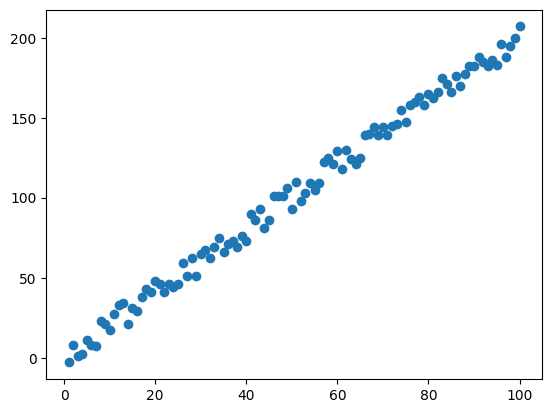

In [148]:
plt.scatter(X.numpy(), y.numpy())
plt.show()

In [161]:
model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.5147]], requires_grad=True)
Parameter containing:
tensor([0.0992], requires_grad=True)


In [162]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [163]:
model = Model(1, 1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.3488]], requires_grad=True)
Parameter containing:
tensor([0.2737], requires_grad=True)


In [164]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.34879469871520996
linear.bias 	 0.2736787796020508


In [165]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([0.9713], grad_fn=<ViewBackward0>)


In [166]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [167]:
epochs = 50
losses = []

for i in range(epochs):
    i = i + 1

    # Predict
    y_pred = model.forward(x)

    # Calculate Loss
    loss = criterion(y_pred, y)
    losses.append(loss.item())

    print(f'epoch - {i} loss - {loss.item()} weights - {model.linear.weight.item()} bias - {model.linear.bias.item()}')

    # Reset gradient for each epoch
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Update hyperparameters
    optimizer.step()

epoch - 1 loss - 13647.056640625 weights - 0.34879469871520996 bias - 0.2736787796020508
epoch - 2 loss - 13443.21484375 weights - 0.7536296248435974 bias - 0.4760962426662445
epoch - 3 loss - 13243.4326171875 weights - 1.1544162034988403 bias - 0.676489531993866
epoch - 4 loss - 13047.625 weights - 1.5511949062347412 bias - 0.8748788833618164
epoch - 5 loss - 12855.7138671875 weights - 1.9440058469772339 bias - 1.071284294128418
epoch - 6 loss - 12667.6201171875 weights - 2.332888603210449 bias - 1.2657257318496704
epoch - 7 loss - 12483.271484375 weights - 2.7178826332092285 bias - 1.45822274684906
epoch - 8 loss - 12302.5908203125 weights - 3.099026679992676 bias - 1.6487947702407837
epoch - 9 loss - 12125.505859375 weights - 3.4763593673706055 bias - 1.8374611139297485
epoch - 10 loss - 11951.9462890625 weights - 3.8499186038970947 bias - 2.024240732192993
epoch - 11 loss - 11781.837890625 weights - 4.219742298126221 bias - 2.2091526985168457
epoch - 12 loss - 11615.1162109375 weig

C:\Users\boscand\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


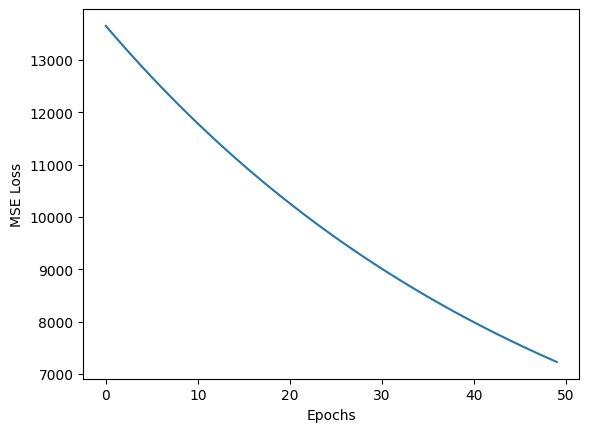

In [168]:
plt.plot(range(epochs), losses)
plt.ylabel("MSE Loss")
plt.xlabel("Epochs")
plt.show()

In [169]:
x = np.linspace(0.0, 100.0, 100)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*x + current_bias
predicted_y

array([   8.26904678,   24.7736235 ,   41.27820021,   57.78277692,
         74.28735363,   90.79193034,  107.29650706,  123.80108377,
        140.30566048,  156.81023719,  173.3148139 ,  189.81939061,
        206.32396733,  222.82854404,  239.33312075,  255.83769746,
        272.34227417,  288.84685089,  305.3514276 ,  321.85600431,
        338.36058102,  354.86515773,  371.36973445,  387.87431116,
        404.37888787,  420.88346458,  437.38804129,  453.89261801,
        470.39719472,  486.90177143,  503.40634814,  519.91092485,
        536.41550157,  552.92007828,  569.42465499,  585.9292317 ,
        602.43380841,  618.93838513,  635.44296184,  651.94753855,
        668.45211526,  684.95669197,  701.46126869,  717.9658454 ,
        734.47042211,  750.97499882,  767.47957553,  783.98415224,
        800.48872896,  816.99330567,  833.49788238,  850.00245909,
        866.5070358 ,  883.01161252,  899.51618923,  916.02076594,
        932.52534265,  949.02991936,  965.53449608,  982.03907

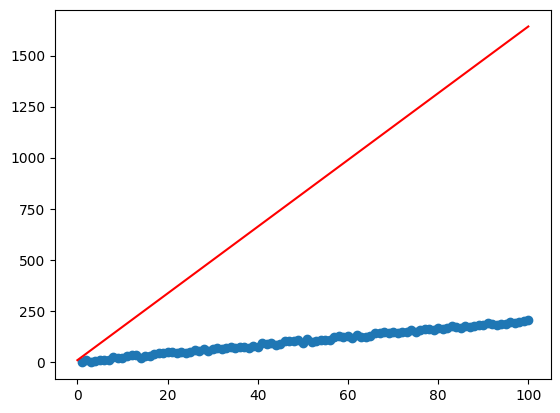

In [170]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y, 'r')
plt.show()

# Artificial Neural Network ANN

In [2]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
class Model(nn.Module):
    def __init__(self, in_features=4, hidden_layer1=4, hidden_layer2=8, out_features=3):
        super().__init__()    # instantiate the nn.Moddule class 

        # Connect the layes into a network
        self.fully_connected1 = nn.Linear(in_features, hidden_layer1)
        self.fully_connected2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, out_features)

    def forward(self, x):
        # Instantiate the activation function
        x = F.relu(self.fully_connected1(x))  
        x = F.relu(self.fully_connected2(x))
        x = self.out(x)

        return x 

In [4]:
model = Model()
model

Model(
  (fully_connected1): Linear(in_features=4, out_features=4, bias=True)
  (fully_connected2): Linear(in_features=4, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)

In [27]:
df = pd.read_csv(f'{os.getcwd()}/iris.csv')
df["variety"] = df['variety'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})

df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df['variety'].unique()

array([0, 1, 2], dtype=int64)

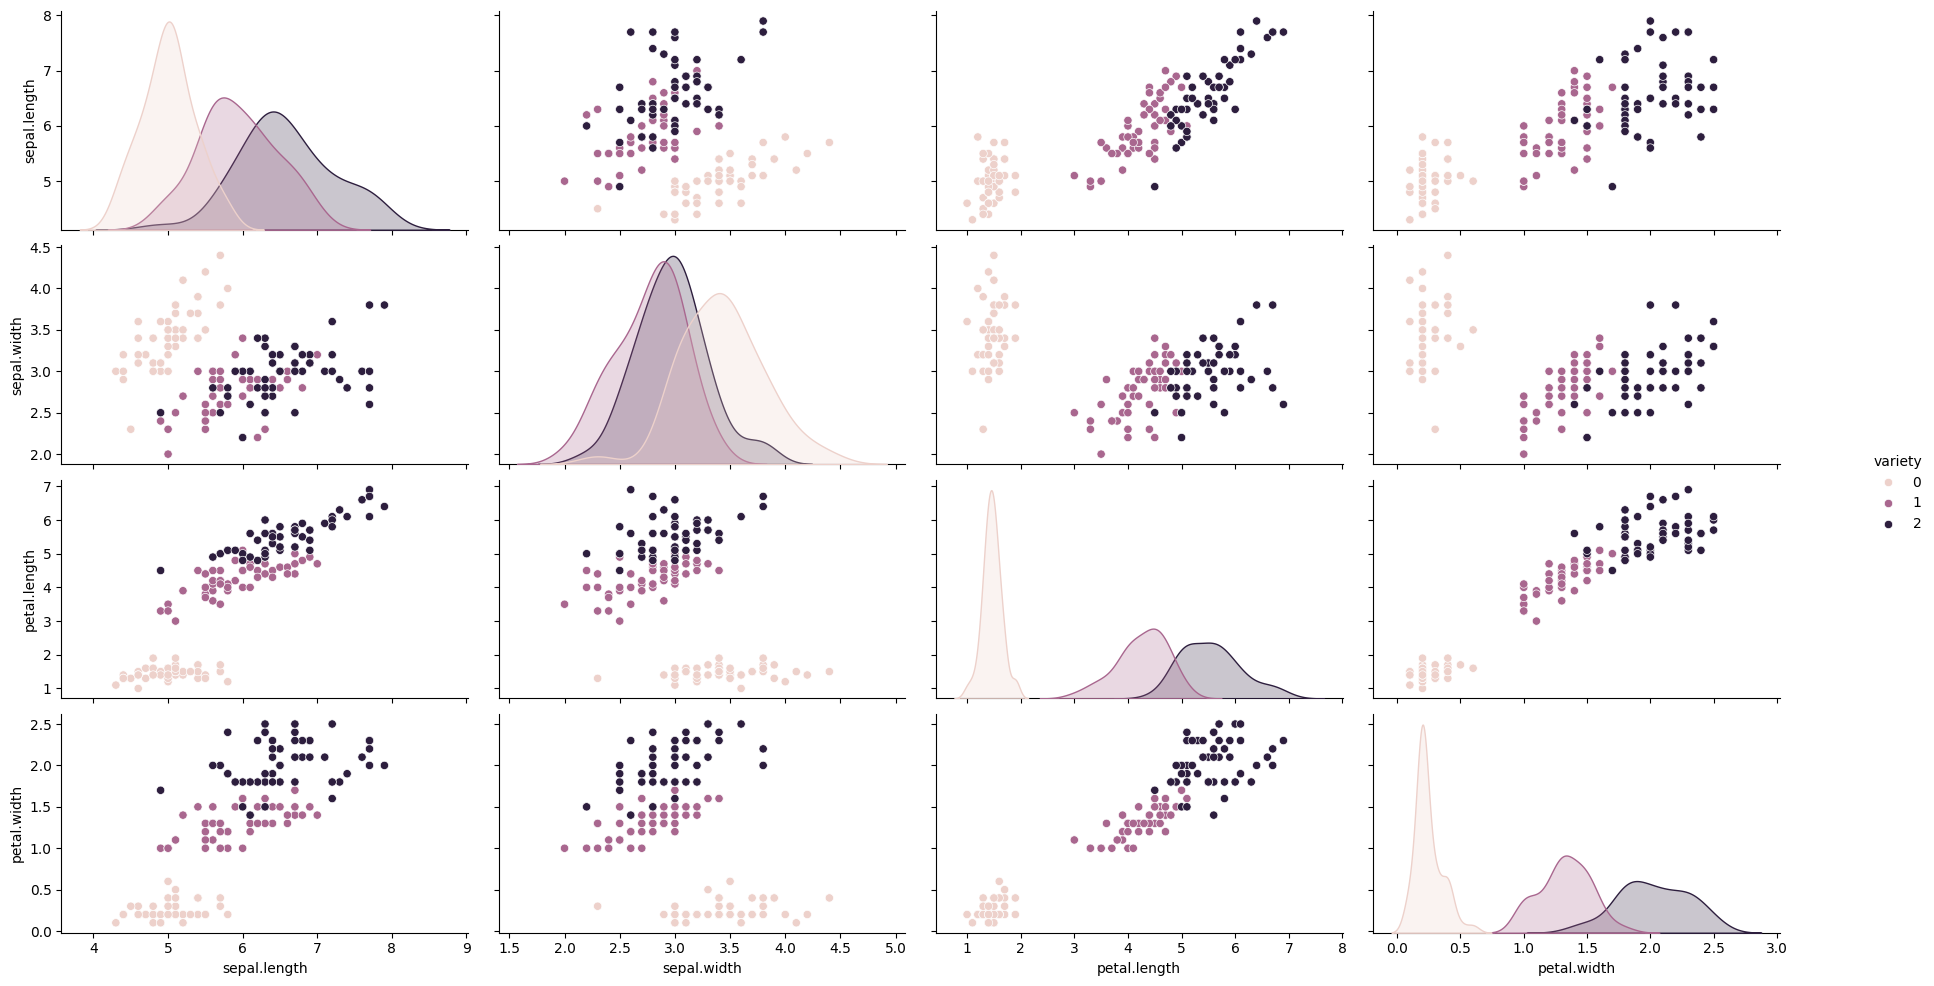

In [36]:
pair_plot = sns.pairplot(data=df, hue="variety")
fig = pair_plot.fig
fig.set_size_inches(20, 10)
plt.show()

In [47]:
X = df.drop('variety', axis=1)
y = df['variety']

print(X, y)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int64


In [48]:
X = X.values
y = y.values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [62]:
epochs = 50
losses = []

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for i in range(epochs):
    i = i + 1

    # Get a prediction
    y_pred = model.forward(X_train)

    # Calculate the loss
    loss = criterion(y_pred, y_train)

    losses.append(loss.item())

    print(f'epoch - {i} loss - {loss}')

    # Adding backpropagation
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


epoch - 1 loss - 0.1815820187330246
epoch - 2 loss - 0.17091073095798492
epoch - 3 loss - 0.16819100081920624
epoch - 4 loss - 0.15915995836257935
epoch - 5 loss - 0.15568746626377106
epoch - 6 loss - 0.1469036191701889
epoch - 7 loss - 0.1448042392730713
epoch - 8 loss - 0.1386399120092392
epoch - 9 loss - 0.1329973340034485
epoch - 10 loss - 0.1304752081632614
epoch - 11 loss - 0.12500275671482086
epoch - 12 loss - 0.12038420885801315
epoch - 13 loss - 0.11772536486387253
epoch - 14 loss - 0.11328499019145966
epoch - 15 loss - 0.10906673222780228
epoch - 16 loss - 0.10654957592487335
epoch - 17 loss - 0.10290611535310745
epoch - 18 loss - 0.09925273805856705
epoch - 19 loss - 0.0969473347067833
epoch - 20 loss - 0.09394063800573349
epoch - 21 loss - 0.09081011265516281
epoch - 22 loss - 0.08875017613172531
epoch - 23 loss - 0.08621632307767868
epoch - 24 loss - 0.08361110091209412
epoch - 25 loss - 0.08182784169912338
epoch - 26 loss - 0.07966210693120956
epoch - 27 loss - 0.07751753

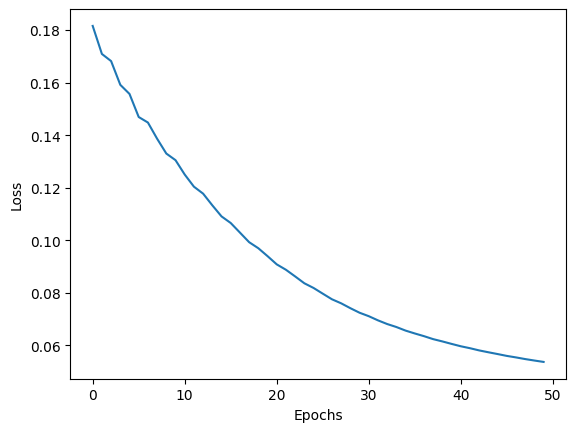

In [67]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [70]:
# Validate the model on test dataset
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

# Lower loss means no overfitting
loss

tensor(0.0861)

In [75]:
new_iris = torch.tensor([6.5, 5.4, 4.2, 1.4])

with torch.no_grad():
    # Calculates the predictions
    print(model(new_iris))

    # Returns the predicted class which is 1
    print(model(new_iris).argmax())

tensor([-0.9682,  1.0035, -3.5252])
tensor(1)


In [ ]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
            
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # Define the layers of the CNN
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(in_features=32*7*7, out_features=128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=128, out_features=10)
        
    def forward(self, x):
        # Define the forward pass of the CNN
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        
        return x


In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [41]:
weight = 0.9
bias = 0.1

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(1) # adds a dimention
y = weight * X + bias # linera regression function

print(f'{X[:10]} - {len(X)} \n {y[:10]} - {len(y)}')


tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) - 50 
 tensor([[0.1000],
        [0.1180],
        [0.1360],
        [0.1540],
        [0.1720],
        [0.1900],
        [0.2080],
        [0.2260],
        [0.2440],
        [0.2620]]) - 50


# Split Data

In [42]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

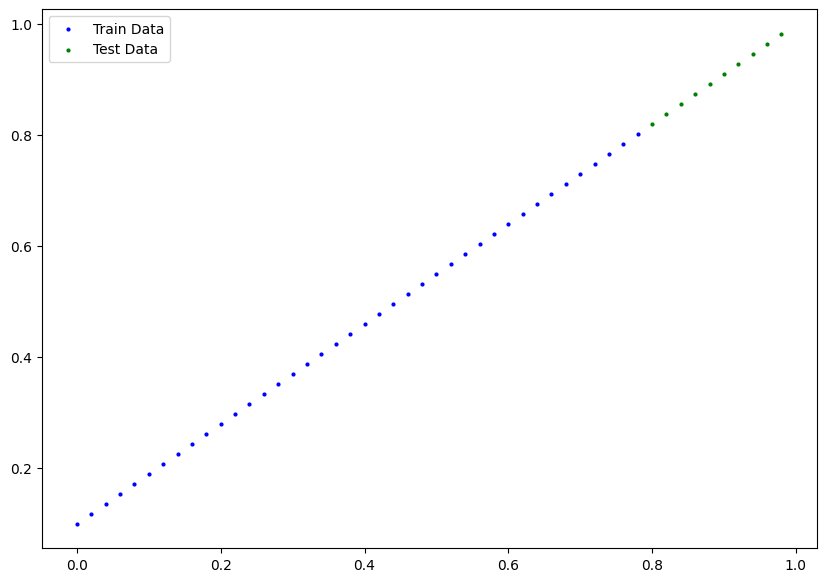

In [43]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c='b', s=4, label='Train Data')
    plt.scatter(test_data, test_labels, c='g', s=4, label='Test Data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
        
    plt.legend()
    plt.show()

plot_predictions()

# Model

In [28]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


In [29]:
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.4217]])),
             ('linear_layer.bias', tensor([0.3816]))])

# Predictions

In [30]:
with torch.inference_mode():
    y_pred = model(X_test)

y_pred, y_test

(tensor([[0.7189],
         [0.7274],
         [0.7358],
         [0.7442],
         [0.7527],
         [0.7611],
         [0.7695],
         [0.7780],
         [0.7864],
         [0.7948]]),
 tensor([[0.8200],
         [0.8380],
         [0.8560],
         [0.8740],
         [0.8920],
         [0.9100],
         [0.9280],
         [0.9460],
         [0.9640],
         [0.9820]]))

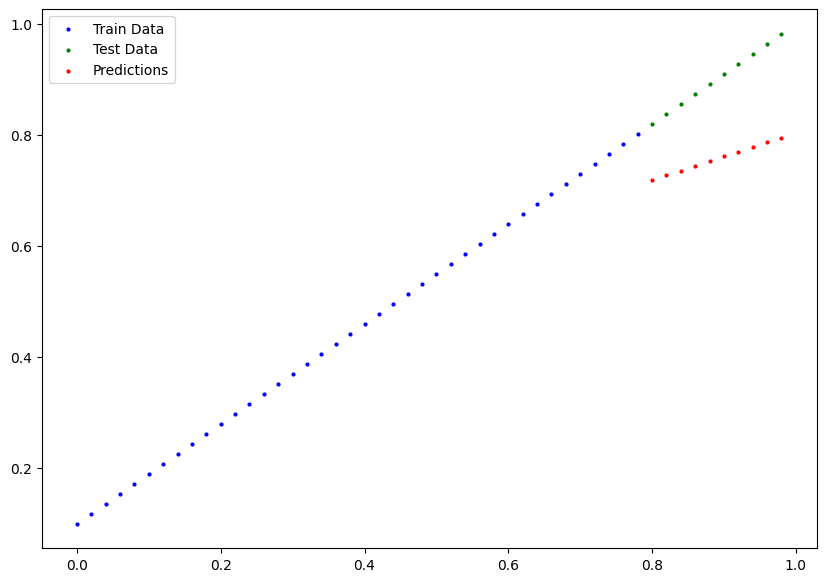

In [31]:
plot_predictions(predictions=y_pred)

# Train

In [32]:
loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [37]:
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model.train() # train model with parameters that require gradients

    y_pred = model(X_train) # forward pass

    loss = loss_function(y_pred, y_train) # calculate loss

    optimizer.zero_grad() # optimizer zero grad

    loss.backward() # perform backpropagation on the loss with respect to the parameters of the model

    optimizer.step() # perform gradient descent

    # Testing the model
    model.eval() # turns off different settings in the model not needed for evaluation or tesitng

    with torch.inference_mode(): # turns off gradient tracking
        test_pred = model(X_test) # forward pass

        test_loss = loss_function(test_pred, y_test) # caluclate loss

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss_values)
        
        print(f'epoch - {epoch} | train loss - {loss} | test loss - {test_loss}')


epoch - 0 | train loss - 0.03372528776526451 | test loss - 0.07831412553787231
epoch - 10 | train loss - 0.030293971300125122 | test loss - 0.07004164159297943
epoch - 20 | train loss - 0.026855161413550377 | test loss - 0.06176915764808655
epoch - 30 | train loss - 0.0234233345836401 | test loss - 0.054183561354875565
epoch - 40 | train loss - 0.0199903454631567 | test loss - 0.04591105505824089
epoch - 50 | train loss - 0.016551537439227104 | test loss - 0.0376385860145092
epoch - 60 | train loss - 0.013121390715241432 | test loss - 0.030052995309233665
epoch - 70 | train loss - 0.009686710312962532 | test loss - 0.021780574694275856
epoch - 80 | train loss - 0.006247906479984522 | test loss - 0.01350814662873745
epoch - 90 | train loss - 0.0028194328770041466 | test loss - 0.005922579672187567
epoch - 100 | train loss - 0.007082066033035517 | test loss - 0.007635992951691151
epoch - 110 | train loss - 0.007082066033035517 | test loss - 0.007635992951691151
epoch - 120 | train loss -

# Predictions


In [38]:
with torch.inference_mode():
    y_pred = model(X_test)

y_pred # predictions

tensor([[0.8261],
        [0.8440],
        [0.8620],
        [0.8799],
        [0.8979],
        [0.9158],
        [0.9338],
        [0.9517],
        [0.9697],
        [0.9876]])

In [39]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8975]])),
             ('linear_layer.bias', tensor([0.1081]))])

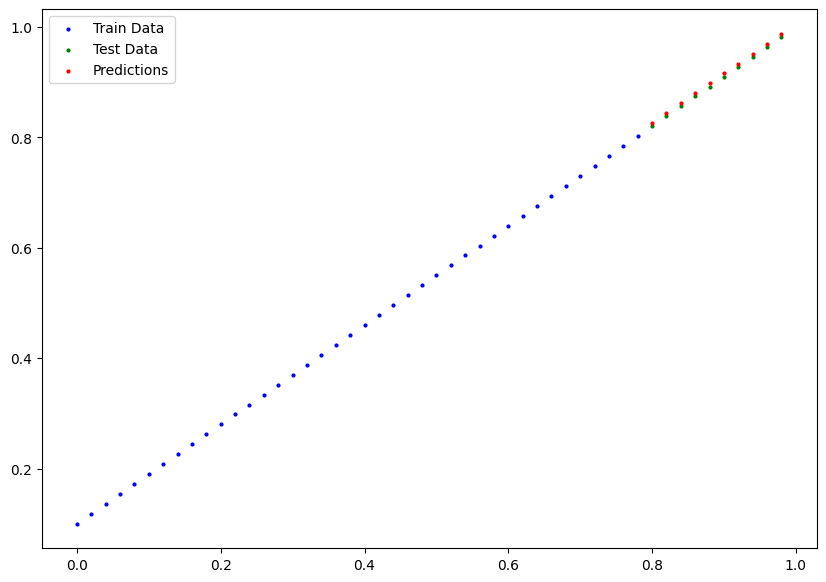

In [40]:
plot_predictions(predictions=y_pred)

In [41]:
plt.figure(figsize=(10, 7))
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Loss Curve Training/Testing')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Save Model

- torch.save() - save in pickle format
- torch.load() - load a saved model
- torch.nn.Module.load_state_dict() - load a saved model state dictionary

In [ ]:
from pathlib import Path

# Model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Model path
MODEL_NAME = 'pytorch_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save model
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

# Load Model

In [ ]:
new_model = LinearRegressionModel()

new_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Classification Model

In [48]:
import torch
import torch.nn as nn
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

from torch_utils import plot_decision_boundary, plot_loss_curves

In [34]:
n_samples = 1000

X, y = make_circles(n_samples=n_samples, 
                    noise=0.03, 
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [35]:
data = pd.DataFrame({'X1': X[:, 0],
                     'X2': X[:, 1], 
                     'label': y})

data.head(5)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


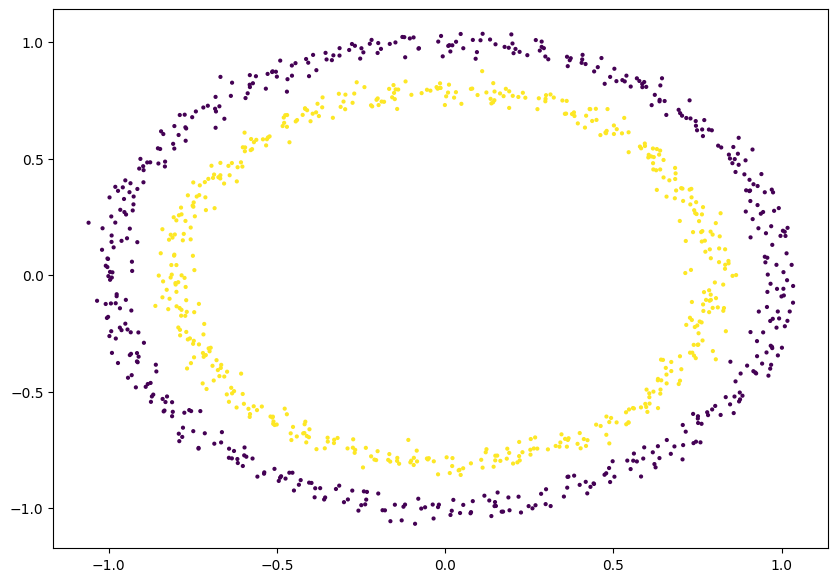

In [36]:
plt.figure(figsize=(10, 7))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=4)
plt.show()

In [37]:
# transform data to tensors and split by train test
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# Model

In [39]:
class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        # x2 Linear layers because x2 shape of train data
        self.layer_1 = nn.Linear(in_features=2, out_features=10) # in_features 2 becaues shape is 2 for X, 10 hidden layers
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1) # out_features 1 becaues shape is 1 for y, 10 hidden layers
        self.relu = nn.ReLU() # add a non linear activation function

    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.layer_3(x)

        return x

In [40]:
model = ClassificationModel()
model

ClassificationModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [41]:
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5849,  0.3598],
                      [ 0.2965, -0.6397],
                      [-0.1109, -0.3124],
                      [ 0.2738,  0.2921],
                      [ 0.2938,  0.1385],
                      [ 0.5444,  0.2840],
                      [ 0.4767,  0.2712],
                      [-0.1747, -0.2631],
                      [-0.4118, -0.1584],
                      [ 0.6183, -0.1591]])),
             ('layer_1.bias',
              tensor([ 0.3358,  0.4088,  0.4273, -0.3837, -0.6834, -0.4014,  0.0974,  0.3399,
                       0.0949,  0.0478])),
             ('layer_2.weight',
              tensor([[-0.0276, -0.0520, -0.0722, -0.0999,  0.0522,  0.2265,  0.2491, -0.2030,
                       -0.2731, -0.0268],
                      [-0.1998, -0.1790,  0.0169,  0.2806, -0.2345,  0.1167, -0.2702, -0.2920,
                       -0.3128, -0.2177],
                      [-0.1636, -0.0088,  0.2141,  0.2659, -0.2257,  0.3

In [42]:
with torch.inference_mode():
    untrained_preds = model(X_test)

torch.round(untrained_preds)

tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-

# Train

In [43]:
loss_function = nn.BCEWithLogitsLoss() # contains sigmoid activation function

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [44]:
# Accuracy - what percentage does the model get right predictions
def accuracy(y_true, y_pred):
    truth = torch.eq(y_true, y_pred).sum().item()
    
    return (truth/len(y_pred)) * 100

In [45]:
epochs = 1000
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model.train()

    # forward step
    y_logits = model(X_train).squeeze() # logits --> probabilities --> labels, squeeze extracts a dimention
    y_pred = torch.round(torch.sigmoid(y_logits)) # using sigmoid, binary classification, softmax is for multiclass classification

    loss = loss_function(y_logits, y_train) # BCEWithLogitsLoss() expects logits

    # optimizer, backpropagation, gradient descent
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # testing the model
    model.eval()

    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_function(test_logits, y_test) # BCEWithLogitsLoss() expects logits

    if epoch % 100 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss_values)
        
        print(f'epoch - {epoch} | Loss - {loss:.4f} | Acc - {accuracy(y_train, y_pred):.2f}% | Test Loss - {test_loss:.4f} | Test Acc - {accuracy(y_test, test_pred):.2f}%')


epoch - 0 | Loss - 0.6947 | Acc - 50.00% | Test Loss - 0.6947 | Test Acc - 50.00%
epoch - 100 | Loss - 0.6885 | Acc - 60.75% | Test Loss - 0.6892 | Test Acc - 53.50%
epoch - 200 | Loss - 0.6850 | Acc - 61.25% | Test Loss - 0.6874 | Test Acc - 59.00%
epoch - 300 | Loss - 0.6810 | Acc - 58.88% | Test Loss - 0.6853 | Test Acc - 57.50%
epoch - 400 | Loss - 0.6754 | Acc - 62.62% | Test Loss - 0.6821 | Test Acc - 60.00%
epoch - 500 | Loss - 0.6674 | Acc - 63.62% | Test Loss - 0.6770 | Test Acc - 61.50%
epoch - 600 | Loss - 0.6553 | Acc - 64.38% | Test Loss - 0.6681 | Test Acc - 62.00%
epoch - 700 | Loss - 0.6330 | Acc - 68.62% | Test Loss - 0.6505 | Test Acc - 63.50%
epoch - 800 | Loss - 0.5841 | Acc - 85.75% | Test Loss - 0.6068 | Test Acc - 78.50%
epoch - 900 | Loss - 0.4878 | Acc - 99.00% | Test Loss - 0.5163 | Test Acc - 96.00%


# Predictions

In [46]:
model.eval()

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model(X_test))).squeeze()

y_preds

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

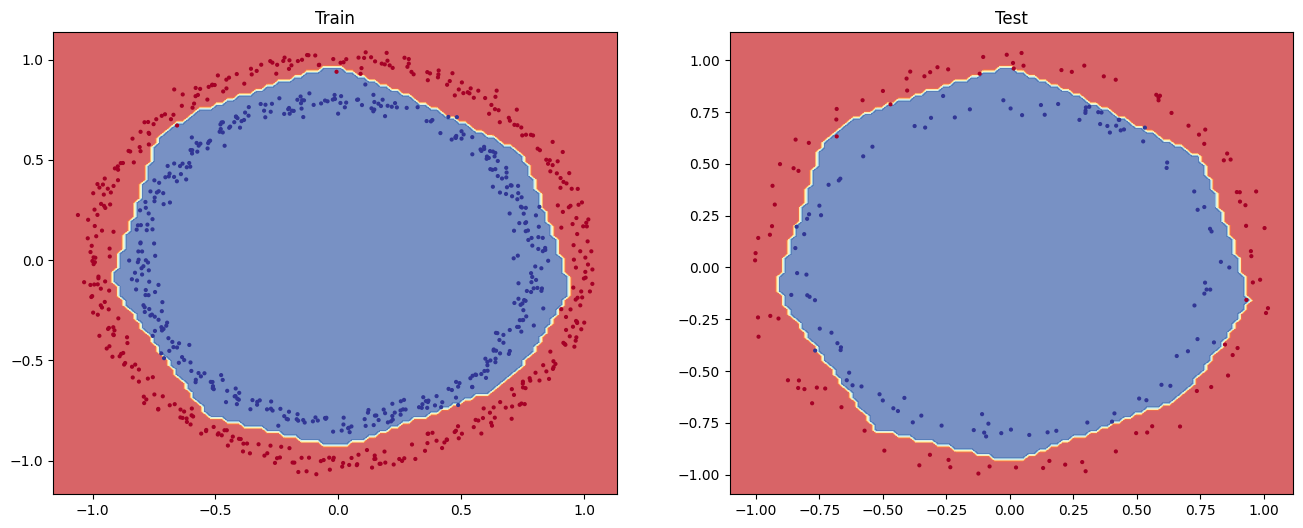

In [47]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)


# Milti Class Classification Model

In [1]:
import torch
import torch.nn as nn
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

from torch_utils import plot_decision_boundary, plot_loss_curves

In [61]:
CLASSES = 4
FEATURES = 2
RANDOM = 42

X, y = make_blobs(n_samples=1000, centers=CLASSES, n_features=FEATURES, cluster_std=1.5, random_state=RANDOM)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

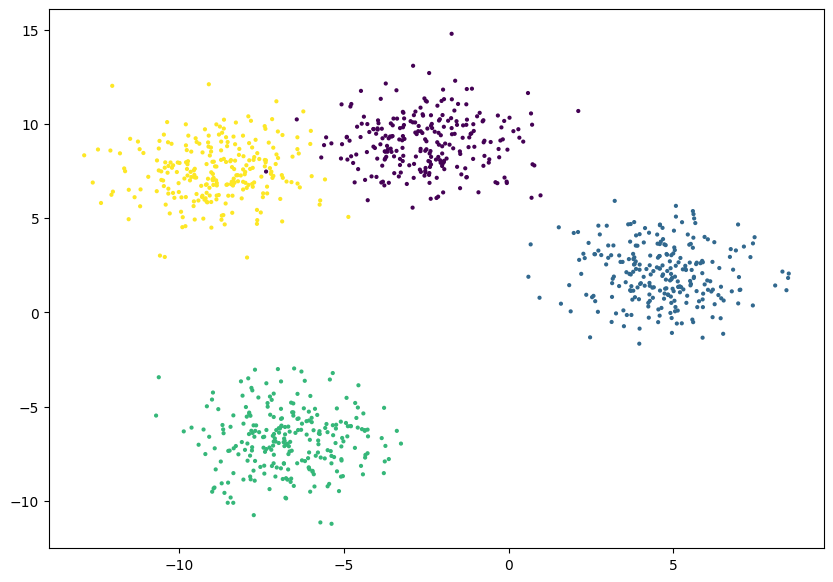

In [63]:
plt.figure(figsize=(10, 7))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=4)
plt.show()

# Model

In [64]:
class MultiClassClassificationModel(nn.Module):
    def __init__(self, in_features, out_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_features)
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

In [65]:
model = MultiClassClassificationModel(in_features=2, out_features=4, hidden_units=8) # output_features equals to haw many classes we have
model

MultiClassClassificationModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [66]:
model.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[-0.2387,  0.0592],
                      [ 0.1456,  0.4676],
                      [ 0.1286,  0.4098],
                      [-0.4365, -0.4839],
                      [-0.6072,  0.3937],
                      [-0.1892, -0.6724],
                      [ 0.4401, -0.4783],
                      [ 0.3829, -0.0989]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5082, -0.0767, -0.2979,  0.2554, -0.4307,  0.6529,  0.3278, -0.5892])),
             ('linear_layer_stack.2.weight',
              tensor([[-0.0263, -0.1049,  0.2272,  0.1799, -0.1626, -0.2122,  0.2412,  0.2695],
                      [-0.2706,  0.2412,  0.1819, -0.0151,  0.3143, -0.3122,  0.0550,  0.2207],
                      [-0.1285, -0.3342, -0.3251, -0.1383,  0.0011, -0.2953, -0.2037,  0.1308],
                      [-0.0390,  0.2380,  0.0045,  0.3128, -0.1054,  0.3007, -0.0850, -0.3419],
                      [ 0.2419, -0.1502, -0.108

In [67]:
model.eval()

with torch.inference_mode():
    y_logits = model(X_test)


y_preds_proba = torch.softmax(y_logits, dim=1)
untrained_preds = torch.argmax(y_preds_proba, dim=1)

untrained_preds, y_test

(tensor([0, 2, 3, 1, 0, 2, 3, 0, 3, 0, 0, 1, 0, 0, 0, 2, 2, 3, 2, 2, 0, 0, 3, 3,
         3, 3, 2, 0, 0, 0, 2, 1, 1, 2, 1, 3, 2, 2, 0, 3, 0, 2, 2, 3, 0, 0, 0, 0,
         0, 2, 1, 0, 0, 2, 2, 3, 0, 1, 2, 3, 3, 0, 2, 3, 3, 0, 0, 2, 2, 0, 0, 2,
         2, 2, 3, 2, 2, 2, 2, 2, 0, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2, 2,
         1, 0, 2, 3, 0, 0, 0, 0, 3, 2, 1, 0, 2, 3, 1, 1, 0, 3, 3, 2, 0, 0, 1, 3,
         3, 2, 0, 1, 3, 0, 0, 0, 3, 2, 0, 3, 0, 3, 0, 2, 0, 0, 1, 1, 1, 0, 3, 3,
         3, 3, 0, 2, 0, 3, 3, 1, 2, 3, 0, 0, 2, 2, 3, 1, 3, 0, 2, 3, 0, 2, 3, 0,
         3, 3, 3, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0,
         1, 2, 3, 0, 2, 1, 3, 1]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3,

In [68]:
# Accuracy - what percentage does the model get right predictions
def accuracy(y_true, y_pred):
    truth = torch.eq(y_true, y_pred).sum().item()
    
    return (truth/len(y_pred)) * 100

# Train

In [69]:
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [70]:
epochs = 100
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model.train()

    # forward step
    y_logits = model(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_function(y_logits, y_train) 

    # optimizer, backpropagation, gradient descent
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # testing the model
    model.eval()

    with torch.inference_mode():
        test_logits = model(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_function(test_logits, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss_values)
        
        print(f'epoch - {epoch} | Loss - {loss:.4f} | Acc - {accuracy(y_train, y_pred):.2f}% | Test Loss - {test_loss:.4f} | Test Acc - {accuracy(y_test, test_pred):.2f}%')

epoch - 0 | Loss - 1.8056 | Acc - 39.62% | Test Loss - 1.4658 | Test Acc - 39.00%
epoch - 10 | Loss - 0.4491 | Acc - 97.75% | Test Loss - 0.3856 | Test Acc - 98.50%
epoch - 20 | Loss - 0.1466 | Acc - 99.00% | Test Loss - 0.1295 | Test Acc - 99.50%
epoch - 30 | Loss - 0.0838 | Acc - 98.88% | Test Loss - 0.0737 | Test Acc - 99.50%
epoch - 40 | Loss - 0.0620 | Acc - 99.00% | Test Loss - 0.0531 | Test Acc - 99.50%
epoch - 50 | Loss - 0.0515 | Acc - 99.00% | Test Loss - 0.0428 | Test Acc - 99.50%
epoch - 60 | Loss - 0.0454 | Acc - 99.00% | Test Loss - 0.0368 | Test Acc - 99.50%
epoch - 70 | Loss - 0.0415 | Acc - 99.00% | Test Loss - 0.0328 | Test Acc - 99.50%
epoch - 80 | Loss - 0.0388 | Acc - 99.00% | Test Loss - 0.0300 | Test Acc - 99.50%
epoch - 90 | Loss - 0.0369 | Acc - 99.00% | Test Loss - 0.0280 | Test Acc - 99.50%


# Predictions

In [71]:
model.eval()

with torch.inference_mode():
    y_preds = torch.softmax(model(X_train), dim=1).argmax(dim=1)

y_preds

tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 3, 2, 3, 2, 1, 1, 3, 2, 2, 2, 3, 1,
        3, 2, 3, 0, 1, 0, 0, 1, 1, 3, 0, 2, 2, 1, 1, 3, 1, 1, 2, 3, 3, 0, 0, 0,
        1, 0, 0, 0, 2, 0, 1, 1, 3, 0, 2, 2, 3, 1, 0, 2, 1, 3, 2, 2, 2, 1, 0, 2,
        3, 1, 1, 1, 2, 0, 0, 1, 2, 3, 1, 3, 3, 2, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1,
        3, 1, 2, 1, 3, 3, 3, 0, 2, 1, 2, 3, 1, 1, 2, 0, 3, 3, 2, 3, 2, 0, 3, 2,
        0, 0, 2, 2, 0, 1, 2, 0, 3, 3, 2, 3, 2, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 2,
        3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 2, 2, 0, 0, 3, 0, 3, 0, 3, 0, 2, 3, 1,
        2, 2, 2, 3, 0, 1, 1, 0, 1, 2, 0, 3, 2, 1, 3, 2, 3, 0, 3, 1, 1, 2, 2, 2,
        2, 2, 2, 0, 3, 3, 2, 1, 1, 2, 3, 1, 0, 0, 1, 3, 0, 1, 3, 3, 2, 3, 3, 3,
        1, 0, 0, 1, 0, 3, 2, 1, 0, 3, 0, 0, 3, 1, 0, 1, 0, 2, 2, 0, 0, 3, 3, 2,
        0, 2, 0, 3, 1, 3, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 3, 1, 1, 0, 2,
        2, 3, 1, 0, 1, 2, 3, 1, 2, 0, 3, 1, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 1, 0,
        2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 3,

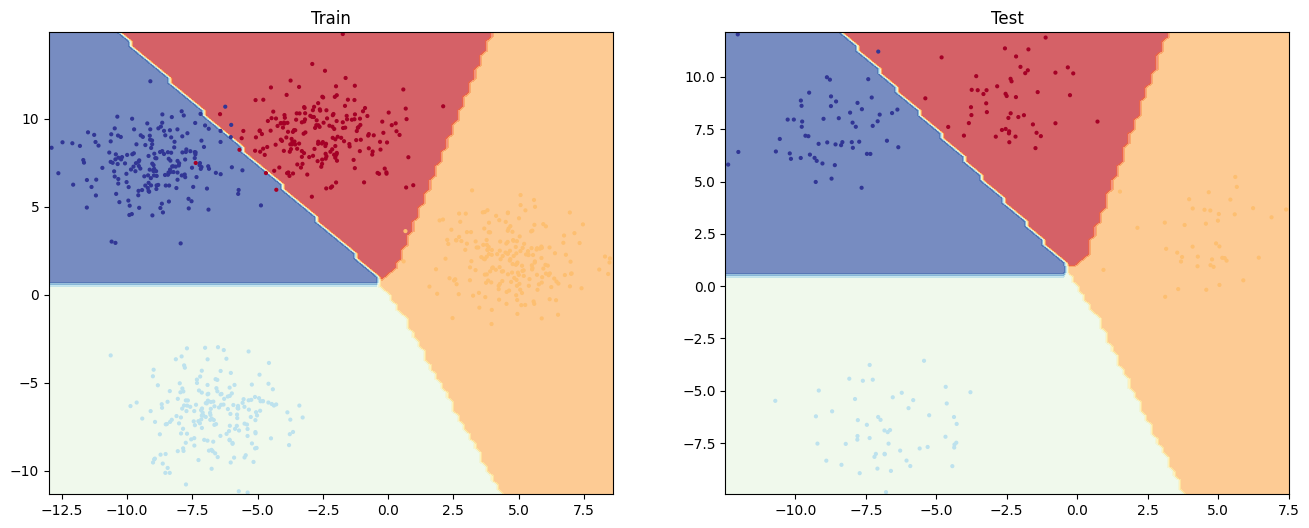

In [72]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)

# Convolutional Neural Network CNN

In [1]:
import torch
import torch.nn as nn
import torchvision
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from sklearn.model_selection import train_test_split
from torch_utils import plot_decision_boundary, plot_loss_curves, accuracy_fn, model_performance

In [2]:
train_data = datasets.FashionMNIST(root='mnist_data', 
                                   train=True, 
                                   download=True, 
                                   transform=transforms.ToTensor(), # transform data to tensor
                                   target_transform=None) # transform target/label

test_data = datasets.FashionMNIST(root='mnist_data', 
                                  train=False, 
                                  download=True, 
                                  transform=transforms.ToTensor(), # transform data to tensor
                                  target_transform=None)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
class_names = train_data.class_to_idx
class_names

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [5]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

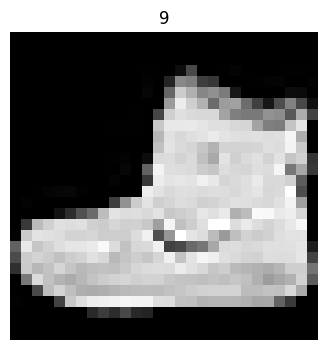

In [6]:
plt.figure(figsize=(4, 4))
plt.imshow(image.squeeze(), cmap='gray')
plt.title(label)
plt.axis(False)
plt.show()

In [7]:
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [8]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [9]:
features, labels = next(iter(train_dataloader))
features.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

# Baseline Linear Model

In [10]:
flatten_model = nn.Flatten() # will create a single vector space

x, _ = train_data[0]

output = flatten_model(x) # performs forward pass

x.shape, output.shape # 28 x 28 = 784 (width, height)

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [11]:
class ImageModel(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(), # using non linear functions
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [12]:
model = ImageModel(input_shape=784, # 28 x 28 = 784 (width, height)
                   hidden_units=10,
                   output_shape=len(class_names))
model

ImageModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [13]:
dummy = torch.rand([1, 1, 28, 28])

model(dummy) # we got 10 possible outputs

tensor([[0.0000, 0.0000, 0.0200, 0.2029, 0.0000, 0.0000, 0.0000, 0.1301, 0.0000,
         0.0000]], grad_fn=<ReluBackward0>)

In [14]:
model.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0290,  0.0331, -0.0284,  ..., -0.0246,  0.0239, -0.0022],
                      [-0.0114,  0.0026,  0.0159,  ..., -0.0124,  0.0091, -0.0347],
                      [ 0.0289, -0.0068,  0.0202,  ..., -0.0123, -0.0191,  0.0068],
                      ...,
                      [-0.0324,  0.0100,  0.0170,  ..., -0.0169,  0.0251, -0.0344],
                      [ 0.0350, -0.0340, -0.0224,  ...,  0.0249, -0.0187, -0.0087],
                      [-0.0284, -0.0240, -0.0155,  ...,  0.0294,  0.0112, -0.0201]])),
             ('layer_stack.1.bias',
              tensor([-0.0222, -0.0198, -0.0233, -0.0218,  0.0186, -0.0166, -0.0129,  0.0235,
                      -0.0009,  0.0048])),
             ('layer_stack.3.weight',
              tensor([[-0.1039,  0.0656, -0.2810, -0.1722, -0.0602,  0.0418,  0.3072, -0.0711,
                       -0.2544,  0.0319],
                      [-0.0775,  0.2652,  0.1168,  0.2446, -0.0240, -0.0073, -0.

# Train

In [15]:
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [16]:
epochs = 2

for epoch in tqdm(range(epochs)):
    print(f'Epoch - {epoch}\n----------------------------------------------------------------')

    train_loss, test_loss, test_acc = 0, 0, 0

    # loop through the batches
    for batch, (X, y) in enumerate(train_dataloader):
        model.train()

        y_pred = model(X)

        loss = loss_function(y_pred, y)

        train_loss += loss # accumulate train loss values
    
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:            
            print(f'Looked at - {batch*len(X)}/{len(train_dataloader.dataset)} samples')

    train_loss /= len(train_dataloader) # calculate train loss average per batch

    model.eval()

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model(X_test)

            test_loss += loss_function(test_pred, y_test) # calulate loss acumulatively

            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader) # calculate test loss average per batch
        test_acc /= len(test_dataloader) # calculate test accuracy average per batch

    print(f'Train Loss - {train_loss:.4f} | Test Loss - {test_loss:.4f} | Test Acc - {test_acc:.4f}%')

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch - 0
----------------------------------------------------------------
Looked at - 0/60000 samples
Looked at - 12800/60000 samples
Looked at - 25600/60000 samples
Looked at - 38400/60000 samples
Looked at - 51200/60000 samples
Train Loss - 0.8944 | Test Loss - 0.7393 | Test Acc - 72.3842%
Epoch - 1
----------------------------------------------------------------
Looked at - 0/60000 samples
Looked at - 12800/60000 samples
Looked at - 25600/60000 samples
Looked at - 38400/60000 samples
Looked at - 51200/60000 samples
Train Loss - 0.7118 | Test Loss - 0.7156 | Test Acc - 73.5423%


# Predictions

In [17]:
def evaluate_model(model, data_loader, loss_function, accuracy_fn):
    loss, acc = 0, 0
    
    model.eval()

    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)

            loss += loss_function(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {'model': model.__class__.__name__, 'loss': loss.item(), 'accuracy': acc}

In [18]:
model = evaluate_model(model=model, 
                       data_loader=test_dataloader, 
                       loss_function=loss_function, 
                       accuracy_fn=accuracy_fn)

model

  0%|          | 0/313 [00:00<?, ?it/s]

{'model': 'ImageModel',
 'loss': 0.7156112194061279,
 'accuracy': 73.5423322683706}

In [19]:
y_pred.argmax(dim=1)

tensor([0, 7, 1, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 0, 7, 7, 1, 7, 4, 1, 3, 0, 1, 5,
        4, 2, 5, 5, 7, 1, 7, 9])

# CNN Model

In [12]:
class CNNModel(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            # input_shape is number of channels in the image, the shape which is 1
            # kernel_size is a matrix, in this case is 3 x 3 
            # stride is hoaw many pixels is model looking at the time
            # padding helps with edges of padding to the image, skipping pixels at a time
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.output_classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape) # 7 * 7 from print at conv_block_2 in order to identify the size
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f'conv_block_1 output shape - {x.shape}')
        x = self.conv_block_2(x)
        # print(f'conv_block_2 output shape - {x.shape}')
        x = self.output_classifier(x)
        # print(f'output_classifier output shape - {x.shape}')
        return x

In [13]:
model = CNNModel(input_shape=1, hidden_units=10, output_shape=len(class_names)) # hiiden units are the outputs classes
model

CNNModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (output_classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [14]:
model.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2068, -0.0072, -0.0248],
                        [-0.0785, -0.2578,  0.2970],
                        [-0.0446, -0.2923,  0.0113]]],
              
              
                      [[[-0.0266,  0.2271,  0.2897],
                        [ 0.0348,  0.1774, -0.0282],
                        [ 0.3137,  0.0517,  0.1616]]],
              
              
                      [[[-0.1050, -0.2405,  0.2663],
                        [-0.2618, -0.2761,  0.1237],
                        [ 0.0634,  0.2380, -0.0510]]],
              
              
                      [[[ 0.1560,  0.1054,  0.0261],
                        [ 0.0989,  0.1211, -0.2094],
                        [-0.2530,  0.1661, -0.2721]]],
              
              
                      [[[ 0.0018, -0.0407, -0.1308],
                        [-0.2785,  0.2930,  0.3267],
                        [-0.0506,  0.2394, -0.0472]]],
              
              
      

In [15]:
# debug trick nn.Linear, it gets printed [10, 7, 7] where the hidden_units are 10 so we have to multiply 7 x 7 to nn.Linear(in_features=hidden_units)
# conv_block_1 output shape - torch.Size([10, 14, 14])
# conv_block_2 output shape - torch.Size([10, 7, 7])
model(train_data[0][0].unsqueeze(1))

tensor([[-0.0059,  0.0261, -0.0058, -0.0122, -0.0264,  0.0248, -0.0370,  0.0326,
         -0.0370,  0.0797]], grad_fn=<AddmmBackward0>)

# Train

In [16]:
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [18]:
epochs = 2

for epoch in tqdm(range(epochs)):
    print(f'Epoch - {epoch}\n----------------------------------------------------------------')

    train_loss, train_acc, test_acc, test_loss = 0, 0, 0, 0

    # loop through the batches
    for batch, (X, y) in enumerate(train_dataloader):
        model.train()

        y_pred = model(X)

        loss = loss_function(y_pred, y)

        train_loss += loss # accumulate train loss values
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:            
            print(f'Looked at - {batch*len(X)}/{len(train_dataloader.dataset)} samples')

    train_loss /= len(train_dataloader) # calculate train loss average per batch
    train_acc /= len(train_dataloader)

    model.eval()

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model(X_test)

            test_loss += loss_function(test_pred, y_test) # calulate loss acumulatively

            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader) # calculate test loss average per batch
        test_acc /= len(test_dataloader) # calculate test accuracy average per batch

    print(f'Loss - {train_loss:.4f}% | Acc - {train_acc:.2f}% | Test Loss - {test_loss:.4f}% | Test Acc - {test_acc:.4f}%')

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch - 0
----------------------------------------------------------------
Looked at - 0/60000 samples
Looked at - 12800/60000 samples
Looked at - 25600/60000 samples
Looked at - 38400/60000 samples
Looked at - 51200/60000 samples
Loss - 0.3379% | Acc - 87.97% | Test Loss - 0.3224% | Test Acc - 88.5683%
Epoch - 1
----------------------------------------------------------------
Looked at - 0/60000 samples
Looked at - 12800/60000 samples
Looked at - 25600/60000 samples
Looked at - 38400/60000 samples
Looked at - 51200/60000 samples
Loss - 0.3033% | Acc - 88.99% | Test Loss - 0.3430% | Test Acc - 88.3187%


# Predictions

In [101]:
# model = evaluate_model(model=model, 
#                        data_loader=test_dataloader, 
#                        loss_function=loss_function, 
#                        accuracy_fn=accuracy_fn)
# model

  0%|          | 0/313 [00:00<?, ?it/s]

{'model': 'CNNModel',
 'loss': 2.3031203746795654,
 'accuracy': 10.013977635782748}

In [19]:
def make_predictions(model, data):
  pred_probs = []
  model.eval()

  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [20]:
test_samples = [] 
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape
     

torch.Size([1, 28, 28])

In [21]:
# Make predictions
pred_probs = make_predictions(model=model, data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[8.0394e-06, 9.9714e-01, 1.9771e-08, 2.7983e-03, 4.8301e-05, 2.3955e-07,
         1.6404e-07, 1.2619e-07, 1.4640e-07, 3.8474e-08],
        [2.3930e-07, 1.5616e-08, 2.1456e-08, 1.7475e-08, 6.3214e-09, 1.0000e+00,
         7.3628e-08, 1.5513e-07, 1.4754e-06, 9.8781e-09]])

In [22]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 5, 9, 1, 9, 1, 6, 0, 1])

In [24]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

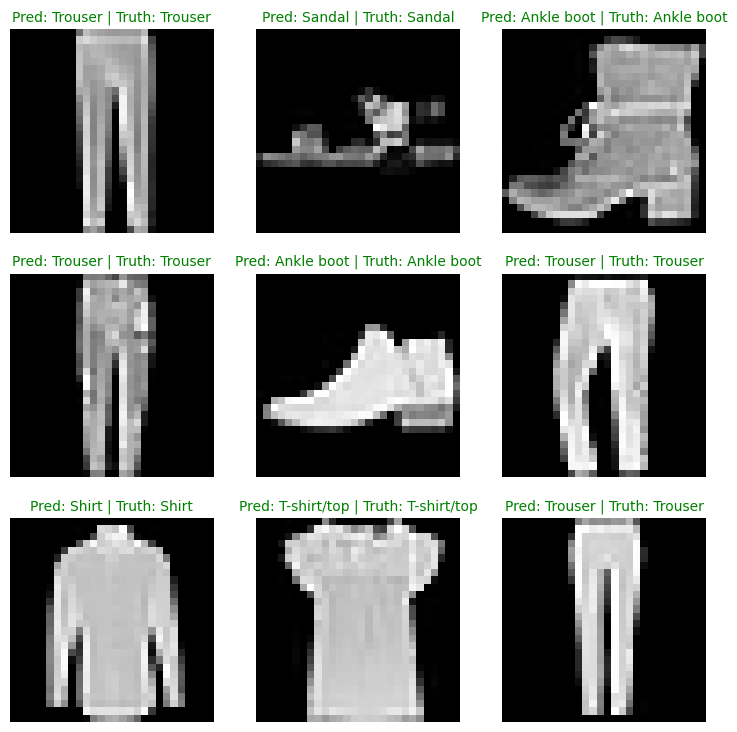

In [25]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form) 
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r") 
  
  plt.axis(False);

# Confusion Matrix

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

y_pred_tensor = torch.cat(y_preds)

# Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

# CNN Custom Datasets

In [1]:
import os
import requests
import torch
import torch.nn as nn
import torchvision
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from pathlib import Path
from PIL import Image
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision import transforms
from sklearn.model_selection import train_test_split
from typing import Tuple, Dict, List
from torch_utils import plot_decision_boundary, plot_loss_curves, accuracy_fn, model_performance

In [2]:
data_path = Path('data/')

def walk_dir(path):
    for path, dirname, files in os.walk(path):
        print(f'There are - {len(dirname)} directories and - {len(files)} images in - {path}')

walk_dir(data_path)

There are - 3 directories and - 0 images in - data
There are - 0 directories and - 106 images in - data\COVID19
There are - 0 directories and - 234 images in - data\NORMAL
There are - 0 directories and - 390 images in - data\PNEUMONIA


In [3]:
# stick tigether all images from directory, * represents a folder
path_list = list(data_path.glob("*/*")) 

# get random image
random_image = random.choice(path_list)

# image class from path
image_class = random_image.parent.stem

# open image
img =  Image.open(random_image)

print(f'Image Path - {random_image}')
print(f'Image Class - {image_class}')

Image Path - data\PNEUMONIA\person120_bacteria_570.jpeg
Image Class - PNEUMONIA


In [4]:
# img to array
img_arr = np.asarray(img)
print(img_arr)


[[ 73  73  74 ... 135 136 138]
 [ 73  73  74 ... 133 134 136]
 [ 74  74  75 ... 133 132 133]
 ...
 [ 17  17  17 ...  25  25  25]
 [ 17  17  17 ...  25  25  25]
 [ 17  17  17 ...  25  25  25]]


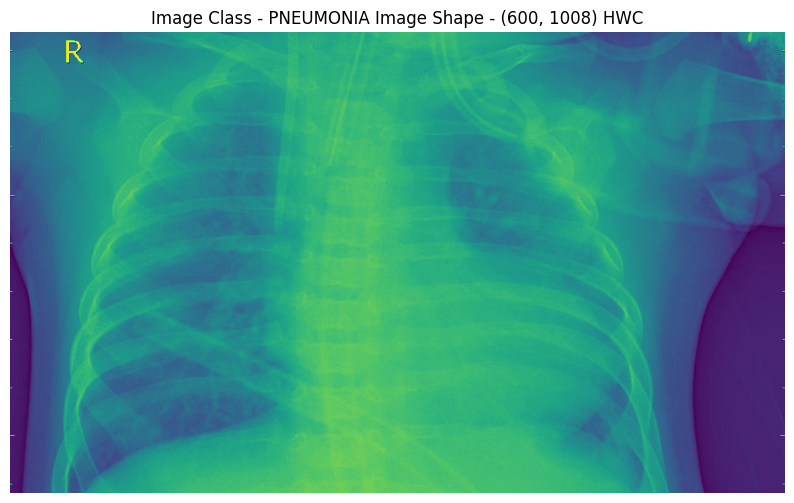

In [5]:
# plot with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_arr.squeeze())
plt.title(f'Image Class - {image_class} Image Shape - {img_arr.shape} HWC')
plt.axis(False)
plt.show()

In [46]:
# transform data to torch tensors
data_transform = transforms.Compose([
    # resize to 64x64
    transforms.Resize(size=(224, 224)),
    # flip images if necessary
    transforms.RandomHorizontalFlip(p=0.5),
    # turn image into a torch tensor
    transforms.ToTensor()
])

print(f'Shape - {data_transform(img).shape}')
print(f'Dtype - {data_transform(img).dtype}')


Shape - torch.Size([1, 224, 224])
Dtype - torch.float32


In [19]:
# plot transformed image
def plot_transform_img(path, transform, n=3):
    random_img_path = random.sample(path, k=n)
    for img_path in random_img_path:
        with Image.open(img_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original Size {f.size}')
            ax[0].axis(False)

            # side by side image
            transformed_image = data_transform(f).permute(1, 2, 0) # HWC to CWH order change because matplotlib expects chanels first then width and height
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed Shape {transformed_image.shape}')
            ax[0].axis(False)

            fig.suptitle(f'Class {img_path.parent.stem}')

plot_transform_img(path=path_list, transform=data_transform, n=1)

In [48]:
data = datasets.ImageFolder(root=data_path, transform=data_transform, target_transform=None)
data

Dataset ImageFolder
    Number of datapoints: 730
    Root location: data
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [49]:
class_dict = data.class_to_idx
class_dict

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [50]:
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=True)

len(train_data), len(test_data)

(584, 146)

In [51]:
img, label = test_data[0][0], test_data[0][1]

print(f'Image tensor - {img}')
print(f'Image shape - {img.shape}')
print(f'Image dtype - {img.dtype}')
print(f'Image label - {label}')
print(f'Image dtypelabel - {type(label)}')

Image tensor - tensor([[[0.8510, 0.8471, 0.7490,  ..., 0.2980, 0.2824, 0.2784],
         [0.8353, 0.8353, 0.8157,  ..., 0.3020, 0.2863, 0.2784],
         [0.8275, 0.8196, 0.8196,  ..., 0.3098, 0.3020, 0.2863],
         ...,
         [0.0431, 0.0431, 0.0431,  ..., 0.0275, 0.0431, 0.0471],
         [0.0431, 0.0431, 0.0431,  ..., 0.0275, 0.0431, 0.0471],
         [0.0431, 0.0431, 0.0431,  ..., 0.0275, 0.0431, 0.0471]],

        [[0.8510, 0.8471, 0.7490,  ..., 0.2980, 0.2824, 0.2784],
         [0.8353, 0.8353, 0.8157,  ..., 0.3020, 0.2863, 0.2784],
         [0.8275, 0.8196, 0.8196,  ..., 0.3098, 0.3020, 0.2863],
         ...,
         [0.0431, 0.0431, 0.0431,  ..., 0.0275, 0.0431, 0.0471],
         [0.0431, 0.0431, 0.0431,  ..., 0.0275, 0.0431, 0.0471],
         [0.0431, 0.0431, 0.0431,  ..., 0.0275, 0.0431, 0.0471]],

        [[0.8510, 0.8471, 0.7490,  ..., 0.2980, 0.2824, 0.2784],
         [0.8353, 0.8353, 0.8157,  ..., 0.3020, 0.2863, 0.2784],
         [0.8275, 0.8196, 0.8196,  ..., 0.3

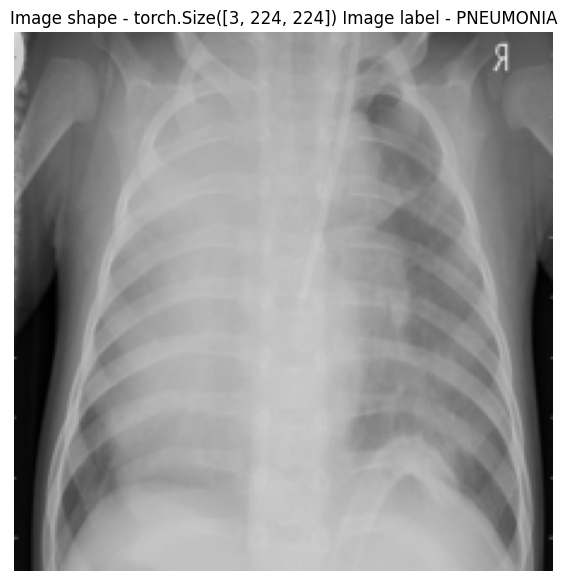

In [52]:
class_names = data.classes

plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.title(f'Image shape - {img.shape} Image label - {class_names[label]}')
plt.axis(False)
plt.show()

In [53]:
# using data loaders (batches of iterables used in the model batch by batch of data sets)
train_dataloader = DataLoader(dataset=train_data, batch_size=14, shuffle=True, num_workers=os.cpu_count())
test_dataloader = DataLoader(dataset=test_data, batch_size=14, shuffle=False, num_workers=os.cpu_count())

len(train_dataloader), len(test_dataloader) # 42 and 11 batches

(42, 11)

In [54]:
img, label = next(iter(train_dataloader))

print(f'Image shape - {img.shape}')
print(f'Label shape - {label.shape}')

Image shape - torch.Size([14, 3, 224, 224])
Label shape - torch.Size([14])


# Create a loading data set out of anything automatically (helper function)

In [42]:
# Setup path for target directory
# train_dir = data_path / 'train'
# test_dir = data_path / 'test'

# target_directory = train_dir
# print(f"Target directory: {target_directory}")

# Get the class names from the target directory
# class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
class_names_found = sorted([entry.name for entry in list(os.scandir(data_path))])
print(f"Class names found: {class_names_found}")

Class names found: ['COVID19', 'NORMAL', 'PNEUMONIA']


In [43]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}

    return classes, class_to_idx

find_classes(data_path)

(['COVID19', 'NORMAL', 'PNEUMONIA'],
 {'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2})

In [44]:
# subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(Path(targ_dir).glob("*/*")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [52]:
# Augment train data
class ConvertToRGB:
    def __call__(self, img):
        if img.mode == 'L' or img.mode == 'RGBA':
            img = img.convert('RGB')
        return img

# transform data to torch tensors
data_transform = transforms.Compose([
    ConvertToRGB(),
    # resize to 64x64
    transforms.Resize(size=(224, 224)),
    # flip images if necessary
    transforms.RandomHorizontalFlip(p=0.5),
    # turn image into a torch tensor
    transforms.ToTensor()
])

data_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [53]:
# plot_transform_img(path=path_list, transform=data_transform) 

In [54]:
data = ImageFolderCustom(targ_dir=data_path, transform=data_transform)

data.classes, data.class_to_idx

(['COVID19', 'NORMAL', 'PNEUMONIA'],
 {'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2})

In [55]:
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=True)

len(train_data), len(test_data)

(584, 146)

In [56]:
# using data loaders (batches of iterables used in the model batch by batch of data sets)
train_dataloader = DataLoader(dataset=train_data, batch_size=14, shuffle=True, num_workers=os.cpu_count())
test_dataloader = DataLoader(dataset=test_data, batch_size=14, shuffle=False, num_workers=os.cpu_count())

len(train_dataloader), len(test_dataloader) # 42 and 11 batches

(42, 11)

In [57]:
img, label = next(iter(train_dataloader))

print(f'Image shape - {img.shape}')
print(f'Label shape - {label.shape}')

Image shape - torch.Size([14, 3, 224, 224])
Label shape - torch.Size([14])


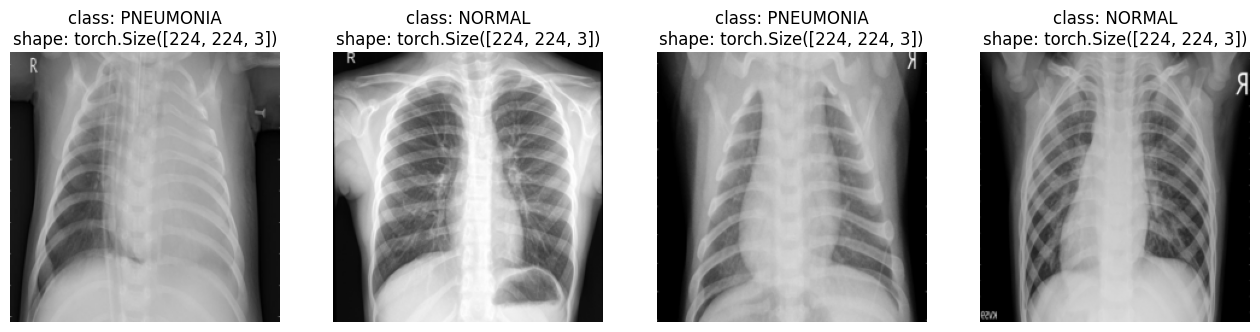

In [58]:
# Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 4. Setup plot
    plt.figure(figsize=(16, 8))

    # 5. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 6. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

# Display random images from ImageFolder created Dataset
class_names = data.classes

display_random_images(train_data, n=4, classes=class_names)

In [59]:
# Data augmentation is the process of altering your data in such a way that you artificially increase the diversity of your training set

# train_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense 
#     transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
# ])

# # Don't need to perform augmentation on the test data
# test_transforms = transforms.Compose([
#     transforms.Resize((224, 224)), 
#     transforms.ToTensor()
# ])

# augmentation_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.TrivialAugmentWide(num_magnitude_bins=31), # data augmentation, incremental improvements for images, this one shows how intense 
#     transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
# ])

In [60]:
# # Get all image paths
# image_path_list = list(data_path.glob("*/*"))

# # Plot random images
# plot_transform_img(path=path_list, transform=augmentation_transforms, n=1)

# Model

In [61]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*56*56,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(f'conv_block_1 output shape - {x.shape}')
        x = self.conv_block_2(x)
        # print(f'conv_block_2 output shape - {x.shape}')  # will print torch.Size([1, 10, 56, 56]) so 56*56 will be used at hidden_units
        x = self.classifier(x)
        # print(f'classifier output shape - {x.shape}')
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

model = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                hidden_units=10, 
                output_shape=len(data.classes))
model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=31360, out_features=3, bias=True)
  )
)

In [62]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model.eval()
with torch.inference_mode():
    pred = model(img_single)
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 224, 224])

Output logits:
tensor([[-0.0025,  0.0044,  0.0025]])

Output prediction probabilities:
tensor([[0.3320, 0.3343, 0.3337]])

Output prediction label:
tensor([1])

Actual label:
1


# Train & Test

In [63]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    
    return train_loss, train_acc

In [64]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    
    return test_loss, test_acc

In [65]:
# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [70]:
EPOCHS = 5

# Recreate an instance of TinyVGG
model = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                hidden_units=10, 
                output_shape=len(data.classes))

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)


# Train model
model_results = train(model=model, 
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn, 
                      epochs=EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0247 | train_acc: 0.4765 | test_loss: 1.0230 | test_acc: 0.5606
Epoch: 2 | train_loss: 0.9068 | train_acc: 0.5769 | test_loss: 0.5489 | test_acc: 0.7576
Epoch: 3 | train_loss: 0.4430 | train_acc: 0.8160 | test_loss: 0.4273 | test_acc: 0.8290
Epoch: 4 | train_loss: 0.3590 | train_acc: 0.8446 | test_loss: 0.6929 | test_acc: 0.8030
Epoch: 5 | train_loss: 0.3351 | train_acc: 0.8724 | test_loss: 0.3400 | test_acc: 0.8485


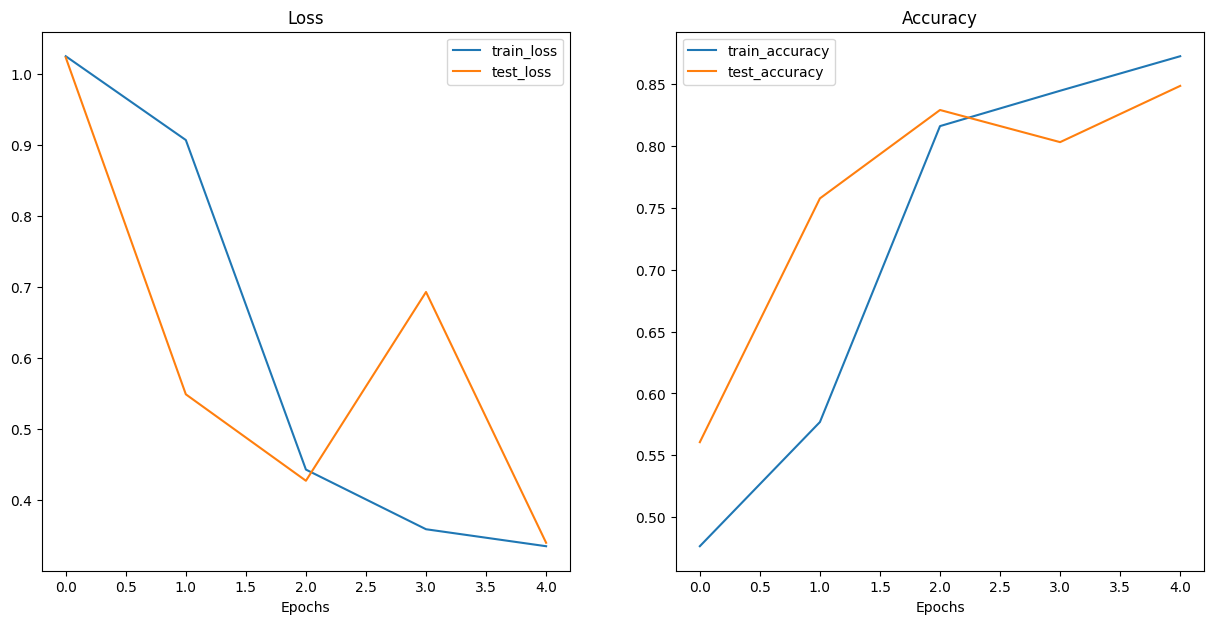

In [71]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

plot_loss_curves(model_results)

# Predictions

In [76]:
def make_predictions(model, data):
  pred_probs = []
  model.eval()

  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [78]:
test_samples = [] 
test_labels = []

# k=3 because we have 3 classes
for sample, label in random.sample(list(test_data), k=3):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([3, 224, 224])

In [79]:
# Make predictions
pred_probs = make_predictions(model=model, data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[3.9028e-04, 9.5694e-01, 4.2667e-02],
        [6.6351e-03, 7.5492e-04, 9.9261e-01]])

In [80]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 2, 2])

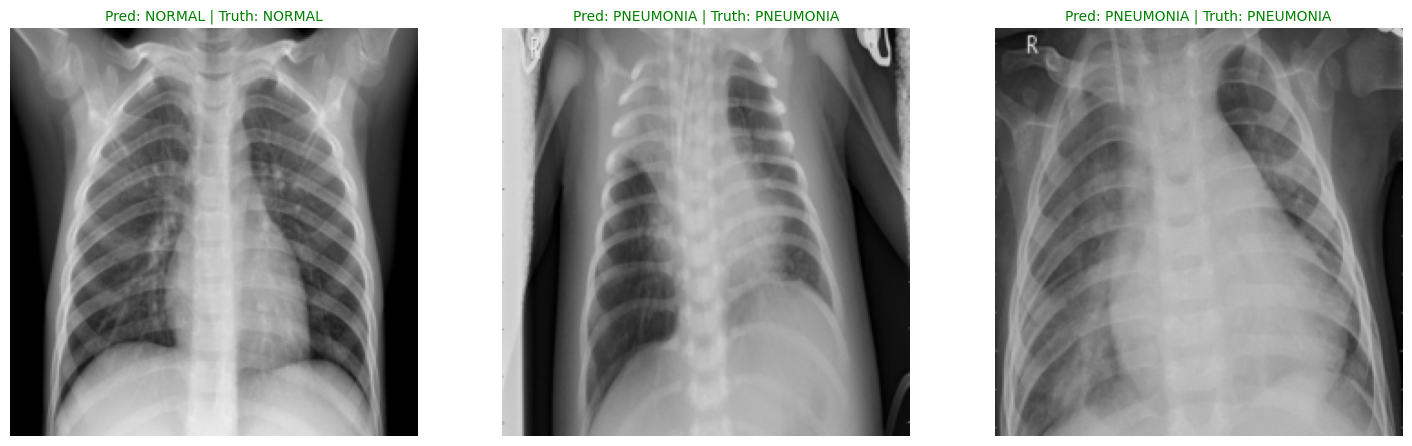

In [89]:
# Plot predictions
plt.figure(figsize=(18, 18))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze().permute(1, 2, 0))

  # Find the prediction
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form) 
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r") 
  
  plt.axis(False);